In [9]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.rc('axes',unicode_minus=False)


In [10]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

{1: 0, 2: 1, 0: 2}


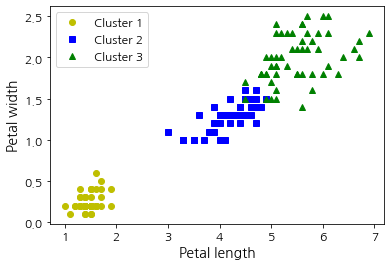

0.9666666666666667

In [12]:
from sklearn.mixture import GaussianMixture
from scipy import stats

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

print(mapping)

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

np.sum(y_pred==y) / len(y_pred)

# 군집화를 위한 데이터 마련

그림 저장: blobs_plot


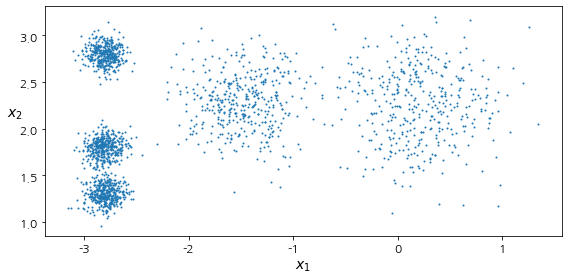

In [15]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

# KMeans 클러스터링
``from sklearn.cluster import KMeans``  
``kmeans=Kmeans(n_clusters=k,random_state=r)``  
``y_pred=kmeans.fit_predict(X)``  

- 새로운 데이터 예측에도 쓸 수 있다.   
``y_pred_new=kmeans.predict(X_new)``

In [16]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

# 보로노이 다이어그램  
``plot_decision_boundaries(kmeans, X)``

그림 저장: voronoi_plot


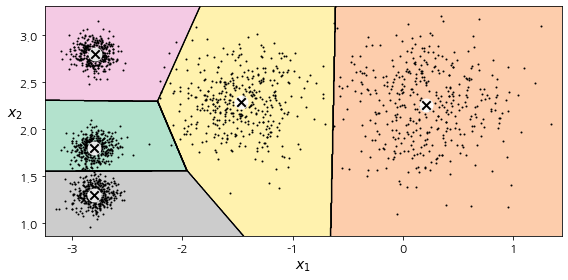

In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

# Kmeans 클러스터링의 단계별 변화
- Kmeans(max_inter=n)를 통해 최대 업데이트 횟수 조절가능

그림 저장: kmeans_algorithm_plot


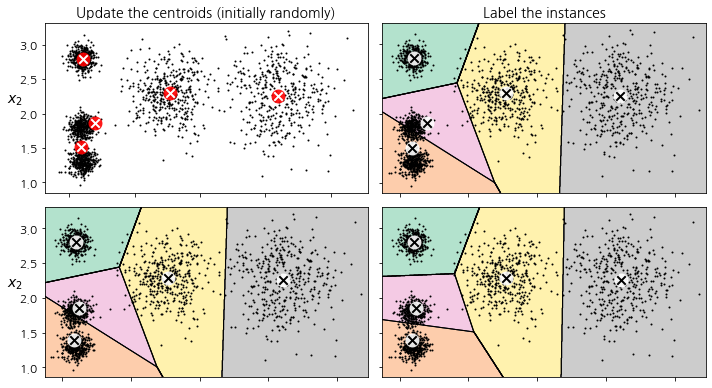

In [28]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=10)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=10)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)

plt.figure(figsize=(10, 8))

#첫그림: 첫초기화상태
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

#두번째그림: 보로노이를 통해 구간을 나눈상태
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

#세번째그림: centroid를 새롭게 변경한 상태
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

#네번째 그림: 보로노이를 통해 구간을 업데이트한 상태
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

# 소프트 군집
- 하드 군집: 원래대로처럼, n개의 클러스터 중 하나에 분류하는 것. (``kmeans.predict, kmeans.fit_predict``)
- 소프트 군집: 하나에 분류하지 않고, n개 클러스터 모두에 대한 센트로이드와의 거리를 측정하는 것. (``kmeans.transform``)

In [34]:
X_dist = kmeans.transform(X)
X_dist[0]

array([0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795])

# Inertia = K-means 클러스터링의 Score

최선의 모델을 선택하려면 K-평균 모델의 성능을 평가할 방법이 있어야 합니다. 안타깝지만 군집은 비지도 학습이기 때문에 타깃이 없습니다. 하지만 적어도 각 샘플과 센트로이드 사이의 거리는 측정할 수 있습니다. 이것이 _이너셔_ 지표의 아이디어입니다:

`n_init` 매개변수를 지정하면 사이킷런은 원래 알고리즘을 `n_init` 번 실행하고 이너셔가 가장 작은 솔루션을 선택합니다. 이 매개변수의 기본값은 `n_init=10`입니다.

In [44]:
#kmeans.transform=[[0에대한거리,1에대한거리,2에대한거리,3에대한거리,4에대한거리]]
X_dist = kmeans.transform(X)

#손으로 계산: inertia계산방법 = 가장 가까운 centroid와의 거리의 제곱을 합한 값. 
calculation= np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2) # 데이터가 속한 클러스터에 대한 거리값 -> 제곱 -> 합
#intertia
inertia=kmeans.inertia_
#score
score=kmeans.score(X)

print('손으로 계산',calculation)
print('Inertia',inertia)
print('Score',score)

손으로 계산 211.59853725816805
Inertia 211.5985372581683
Score -211.5985372581683


그림 저장: kmeans_variability_plot


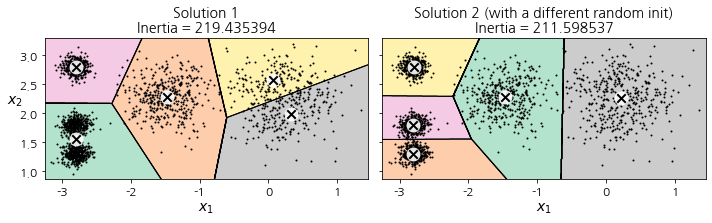

(219.43539442771404, 211.5985372581683)

In [46]:
#서로 다른 두개의 random_state에 대해 inertia 값을 비교해보았다. 

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    
    title1=title1+"\nInertia = %f"%clusterer1.inertia_
    title2=title2+"\nInertia = %f"%clusterer2.inertia_


    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

    

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

kmeans_rnd_init1.inertia_,kmeans_rnd_init2.inertia_

# n_init
- ``KMeans(n_init=n)``을 통해 여러개의 random_state를 시도하고 그 중에서 가장 inertia 값이 좋은 것을 선택할 수 있다. 

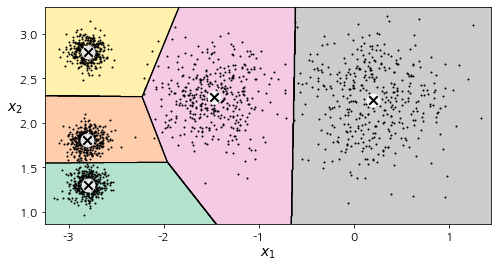

In [26]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()